                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

<ipython-input-3-e859c2e6c9cd>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9258658008658008
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1107
           1       0.93      0.88      0.91       741

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848

Lead scores have been successfully assigned and saved to Leads_with_Scores.csv.


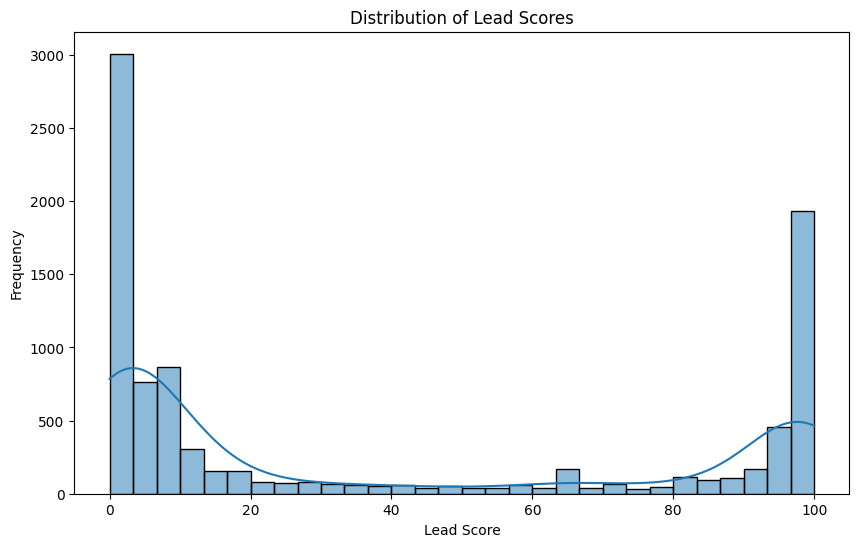

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv('Leads.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Drop columns that are not useful for the model
# These columns are either identifiers or contain information that is not relevant for prediction
df.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'City', 'Last Notable Activity'], axis=1, inplace=True)

# Handle missing values by filling them with a placeholder value
# This ensures that the model can handle missing data without errors
df.fillna('Unknown', inplace=True)

# Convert categorical variables into dummy/indicator variables
# This step is necessary for the logistic regression model to process categorical data
df = pd.get_dummies(df, drop_first=True)

# Define the feature variables (X) and the target variable (y)
# 'Converted' is the target variable we want to predict
X = df.drop('Converted', axis=1)
y = df['Converted']

# Split the dataset into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
# Logistic regression is chosen for its simplicity and effectiveness in binary classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
# Accuracy is a common metric to evaluate classification models
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
# This report provides detailed metrics such as precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Predict probabilities for each lead in the dataset
# The probabilities are used to assign lead scores between 0 and 100
lead_scores = model.predict_proba(X)[:, 1] * 100

# Add the lead scores to the original dataframe
df['Lead Score'] = lead_scores

# Save the dataframe with lead scores to a new CSV file
df.to_csv('Leads_with_Scores.csv', index=False)

print("Lead scores have been successfully assigned and saved to Leads_with_Scores.csv.")

# Visualize the distribution of lead scores
# This helps to understand the spread and concentration of lead scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead Score'], bins=30, kde=True)
plt.title('Distribution of Lead Scores')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.show()